In [1]:
from simulator import *
from reinforce import *
from qlearning import *

# Q-učenje

## Kreiranje model

In [2]:
agent = Qlearner()

## Obučavanje agenta

In [3]:
agent.learn()

## Prosečna nagrada po epizodi

In [4]:
agent.repeat_epochs(10)

Prosecna ukupna nagrada koju agent ostvaruje tokom jedne epizode je 3.0.


## Optimalna politika i prikaz Q(s,a) i V(s) po iteracijama

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down


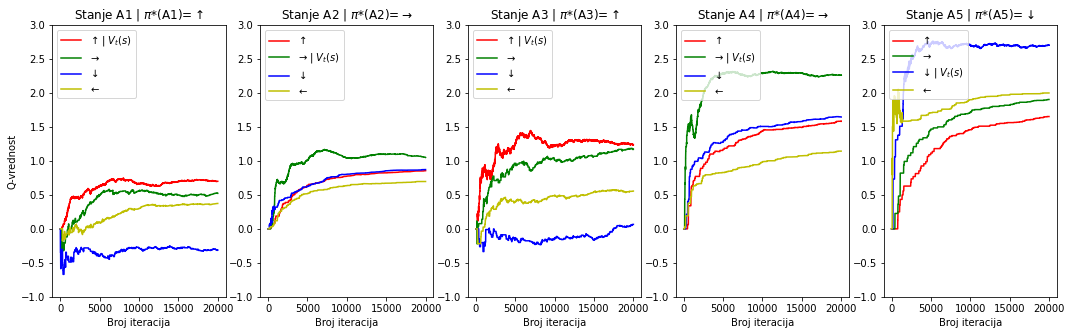

In [5]:
agent.optimal_policy()
agent.visualize()  

## Eksperiment sa $\gamma$ = 0.999

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije down
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije left


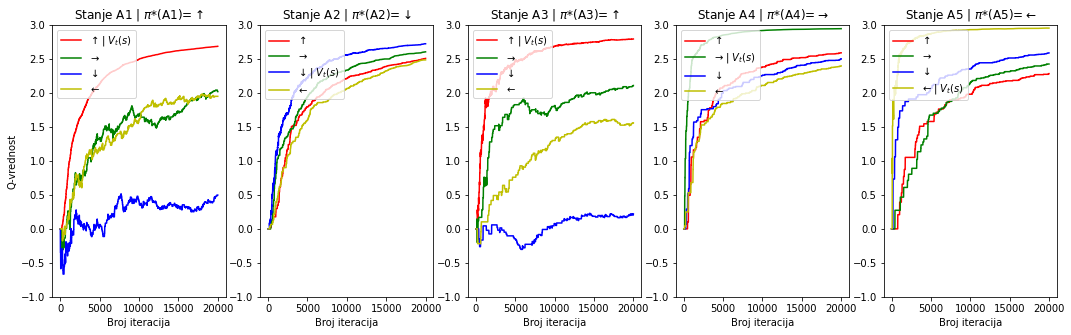

In [6]:
del agent
agent = Qlearner(gamma=0.999)
agent.learn()
agent.optimal_policy()
agent.visualize()  

## Eksperiment sa fiksiranom stopom obučavanja $\alpha$=0.1

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down


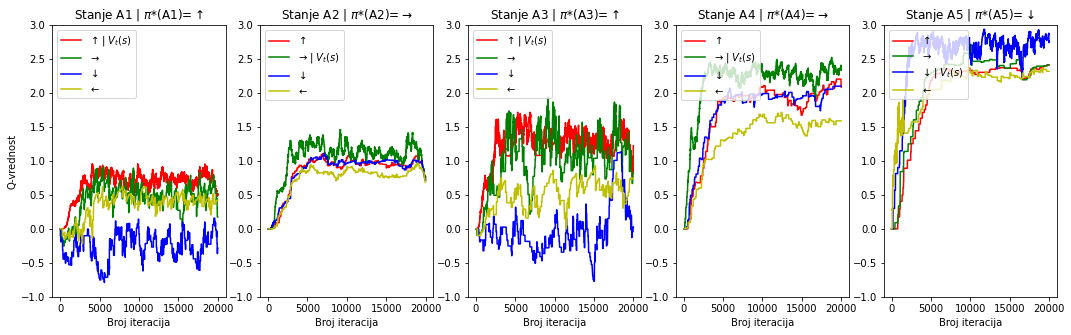

In [7]:
del agent
agent = Qlearner(lr=0.1)
agent.learn()
agent.optimal_policy()
agent.visualize()  

## Eksperiment sa fiksiranom stopom obučavanja $\alpha$=0.01

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije left


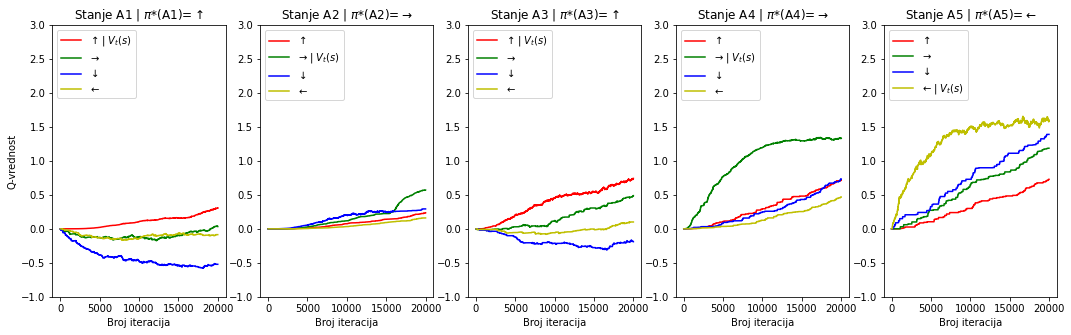

In [8]:
del agent
agent = Qlearner(lr=0.01)
agent.learn()
agent.optimal_policy()
agent.visualize()  

## Eksperiment sa fiksiranom stopom obučavanja $\alpha$=0.05

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down


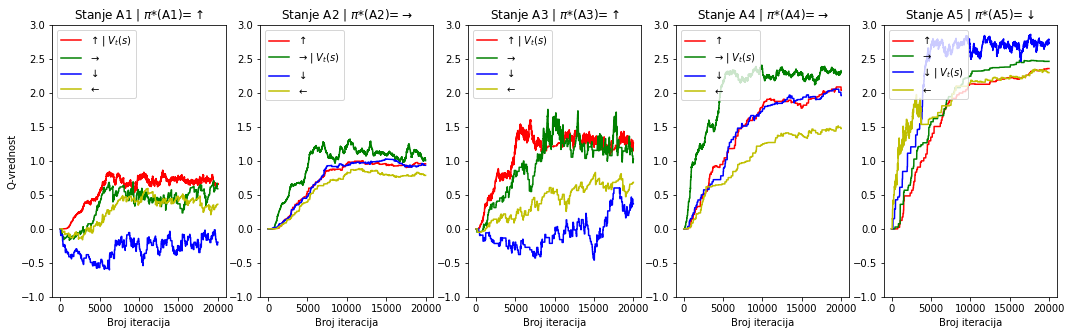

In [9]:
del agent
agent = Qlearner(lr=0.05)
agent.learn()
agent.optimal_policy()
agent.visualize()  

# REINFORCE algoritam

## Obučavanje agenta (promenljiva stopa obučavanja)

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije left
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije left
U stanju A5 optimalna politika nalaze preduzimanje akcije left
Posecna nagrade po epizodi je -1.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije left
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije left
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.4


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.4


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.2


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.8


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 3.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.2


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 3.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.4


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.8


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.4


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.2


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 3.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] d


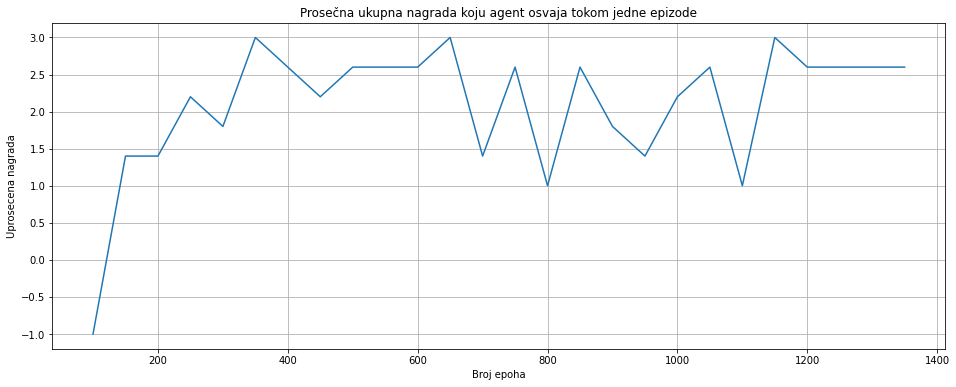

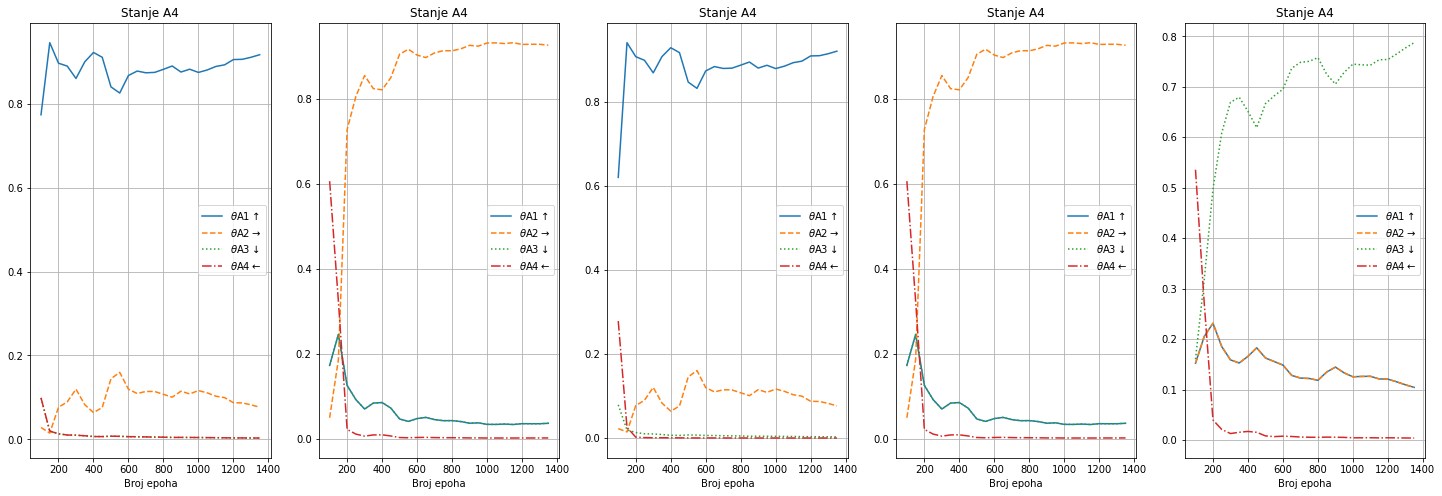

In [3]:
del agent

# Kreiranje modela
agent = Reinforce()

# Eksperiment sa promenljivim faktorom obucavanja
run_experiment(agent)

## Obučavanje agenta | $\alpha$ = 0.4

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 3.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije up
Posecna nagrade po epizodi je 3.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije up
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije up
Posecna nagrade po epizodi je 2.2


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije up
Posecna nagrade po epizodi je 3.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije up
Posecna nagrade po epizodi je 3.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije up
Posecna nagrade po epizodi je 3.0


Zavrsi obučavanje? [da/ne] d


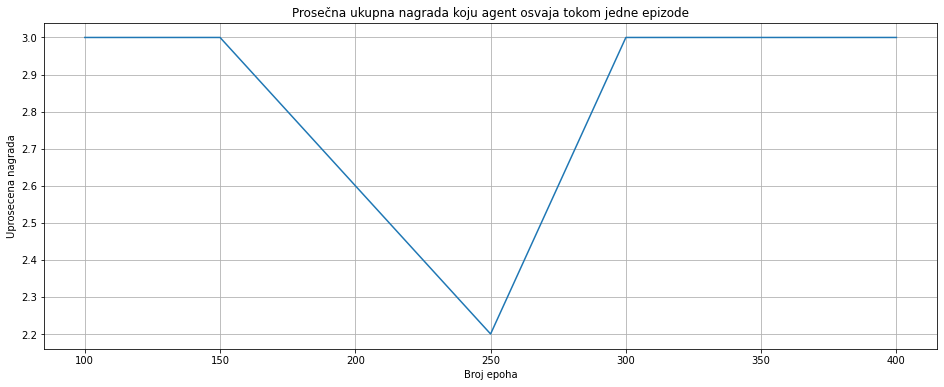

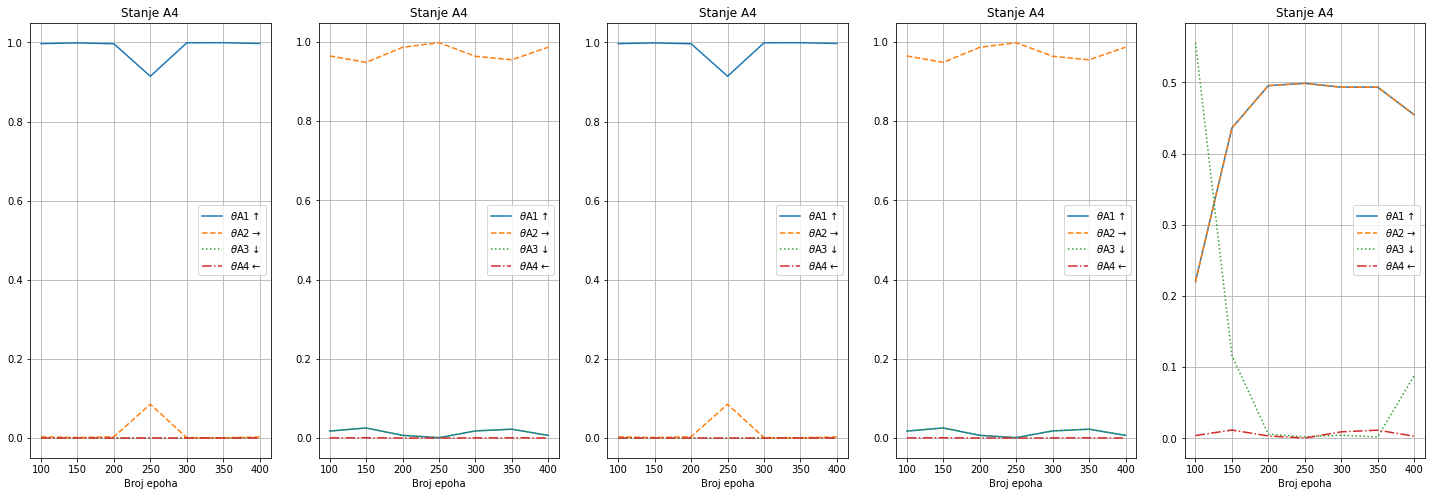

In [5]:
del agent

# Kreiranje modela
agent = Reinforce(lr=0.4)

# Eksperiment sa promenljivim faktorom obucavanja
run_experiment(agent)

## Obučavanje agenta | $\alpha$ = 1

U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 2.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je -0.2


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.8


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.4


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.4


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.8


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.0


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.6


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.0


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.4


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.0


Zavrsi obučavanje? [da/ne] d


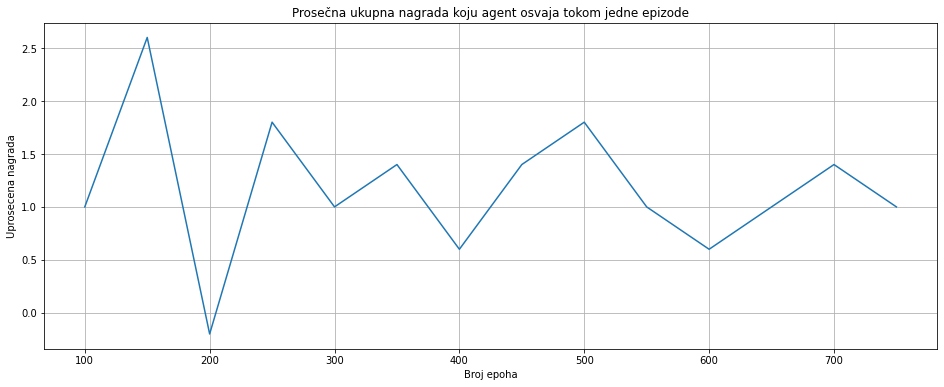

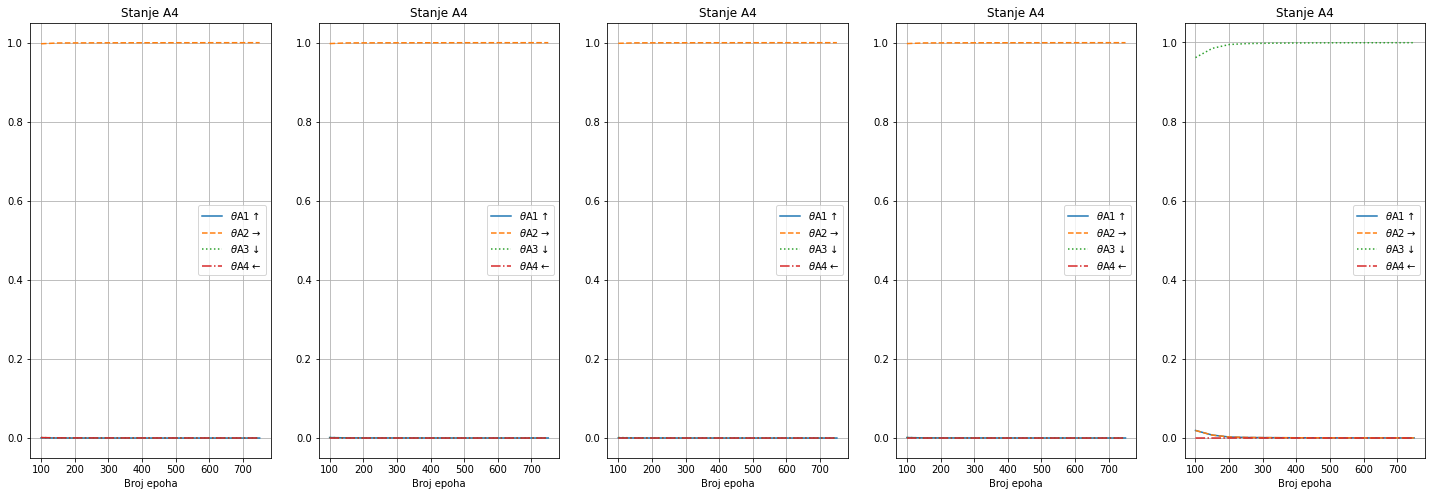

In [6]:
del agent

# Kreiranje modela
agent = Reinforce(lr=1)

# Eksperiment sa promenljivim faktorom obucavanja
run_experiment(agent)

## Obučavanje agenta | $\alpha$ = 0.01

U stanju A1 optimalna politika nalaze preduzimanje akcije up
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije up
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije up
Posecna nagrade po epizodi je -0.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je -0.2


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.6


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je -0.2


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.2


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.6


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.6


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.2


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.2


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 1.0


Zavrsi obučavanje? [da/ne] 


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.2


Zavrsi obučavanje? [da/ne] n


U stanju A1 optimalna politika nalaze preduzimanje akcije right
U stanju A2 optimalna politika nalaze preduzimanje akcije right
U stanju A3 optimalna politika nalaze preduzimanje akcije right
U stanju A4 optimalna politika nalaze preduzimanje akcije right
U stanju A5 optimalna politika nalaze preduzimanje akcije down
Posecna nagrade po epizodi je 0.6


Zavrsi obučavanje? [da/ne] d


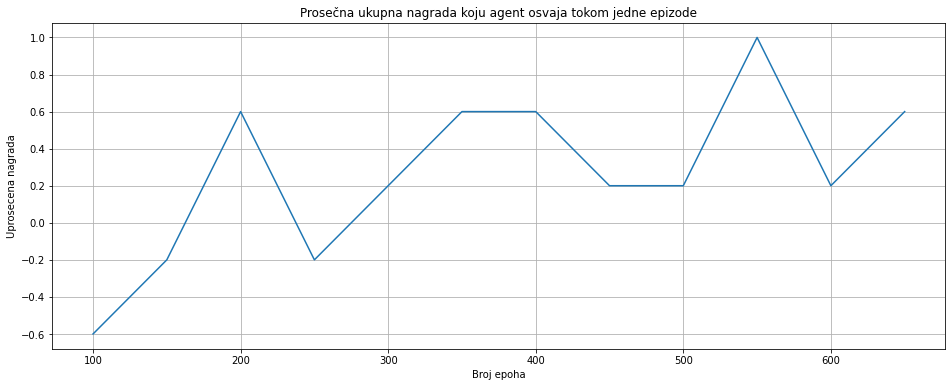

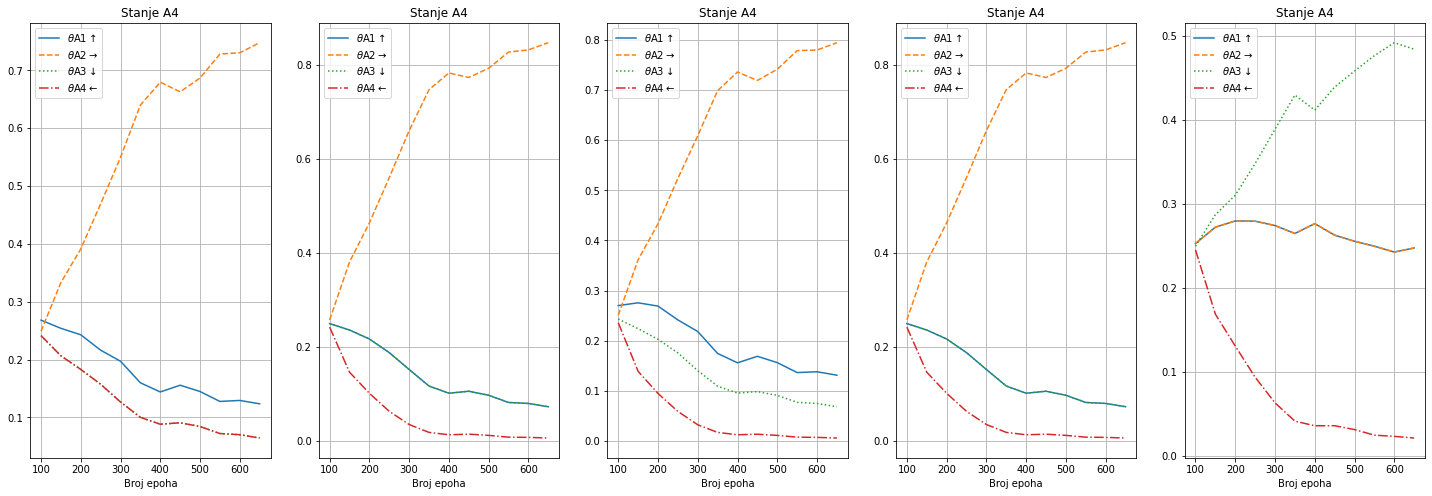

In [7]:
del agent

# Kreiranje modela
agent = Reinforce(lr=0.01)

# Eksperiment sa promenljivim faktorom obucavanja
run_experiment(agent)